<a href="https://colab.research.google.com/github/abhyudaya29/ML_algos/blob/main/Vgg_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The full name of VGG is the Visual Geometry Group, which belongs to the Department of Science and Engineering of Oxford University. It has released a series of convolutional network models beginning with VGG, which can be applied to face recognition and image classification, from VGG16 to VGG19. The original purpose of VGG’s research on the depth of convolutional networks is to understand how the depth of convolutional networks affects the accuracy and accuracy of large-scale image classification and recognition. -Deep-16 CNN), in order to deepen the number of network layers and to avoid too many parameters, a small 3x3 convolution kernel is used in all layers.

Network Structure of VGG19

The network structure
The input of VGG is set to an RGB image of 224x244 size. The average RGB value is calculated for all images on the training set image, and then the image is input as an input to the VGG convolution network. A 3x3 or 1x1 filter is used, and the convolution step is fixed. . There are 3 VGG fully connected layers, which can vary from VGG11 to VGG19 according to the total number of convolutional layers + fully connected layers. The minimum VGG11 has 8 convolutional layers and 3 fully connected layers. The maximum VGG19 has 16 convolutional layers. +3 fully connected layers. In addition, the VGG network is not followed by a pooling layer behind each convolutional layer, or a total of 5 pooling layers distributed under different convolutional layers. The following figure is VGG Structure diagram:


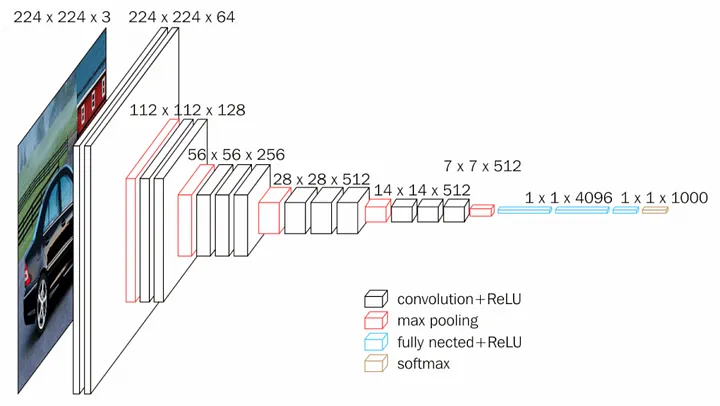

In [1]:
! pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=6cf1b2619ac21dfed8fbc01a143a9147bce52c6461916c6347960444d747d9ce
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [2]:
import tensorflow as tf
from tensorflow import keras
import keras,os
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
import numpy as np

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import tflearn.datasets.oxflower17 as oxflowers17
from keras.utils import to_categorical

In [6]:
X,y=oxflowers17.load_data()
X_train=X.astype('float32')/255.0
y_train=to_categorical(y,num_classes=17)

In [7]:
print(X_train.shape)
print(y_train.shape)

(1360, 224, 224, 3)
(1360, 17)


In [8]:
model=Sequential()

In [9]:
model=Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=17,activation="softmax"))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [11]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1,validation_split=0.2,shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/5
1088/1088 [==============================] - ETA: 0s - loss: 2.8375 - acc: 0.0551

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 44s 40ms/sample - loss: 2.8375 - acc: 0.0551 - val_loss: 2.8378 - val_acc: 0.0404
Epoch 2/5
1088/1088 [==============================] - 14s 13ms/sample - loss: 2.8341 - acc: 0.0561 - val_loss: 2.8405 - val_acc: 0.0404
Epoch 3/5
1088/1088 [==============================] - 14s 13ms/sample - loss: 2.8327 - acc: 0.0634 - val_loss: 2.8422 - val_acc: 0.0331
Epoch 4/5
1088/1088 [==============================] - 14s 13ms/sample - loss: 2.8328 - acc: 0.0653 - val_loss: 2.8442 - val_acc: 0.0331
Epoch 5/5
1088/1088 [==============================] - 14s 13ms/sample - loss: 2.8328 - acc: 0.0570 - val_loss: 2.8432 - val_acc: 0.0331
